### Mendeley Data : Dataset Kesehatan Mental berdasarkan DASS-21

In [2]:
import pandas as pd 

data_mendeley = pd.read_csv ('../dataset/mendeley_DASS.csv')
data_mendeley.head(5)

,Q1_1,Q1_2,Q1_3,Q1_4,Q1_5,Q1_6,Q3_1_S1,Q3_2_S2,Q3_3_S3,Q3_4_S4,...,Anxiety_Level,Q3_15_D1,Q3_16_D2,Q3_17_D3,Q3_18_D4,Q3_19_D5,Q3_20_D6,Q3_21_D7,Depression_Score,Depression_Level
0,21,2,0,4,4,1,3,3,3,3,...,3,0,3,3,2,3,3,3,17,5
1,18,2,0,4,4,1,3,3,3,3,...,2,0,2,3,0,0,2,0,7,3
2,40,2,1,2,1,1,3,3,1,2,...,5,2,1,1,2,2,1,2,11,4
3,24,1,0,4,2,0,3,3,1,2,...,5,2,1,1,2,2,1,2,11,4
4,50,1,1,2,2,0,3,3,3,2,...,2,1,0,0,1,2,0,0,4,1


In [200]:
data_mendeley.shape

(1812, 33)

In [201]:
data_mendeley.isnull().sum()

Q1_1                0
Q1_2                0
Q1_3                0
Q1_4                0
Q1_5                0
Q1_6                0
Q3_1_S1             0
Q3_2_S2             0
Q3_3_S3             0
Q3_4_S4             0
Q3_5_S5             0
Q3_6_S6             0
Q3_7_S7             0
Stress_Score        0
Stress_Level        0
Q3_8_A1             0
Q3_9_A2             0
Q3_10_A3            0
Q3_11_A4            0
Q3_12_A5            0
Q3_13_A6            0
Q3_14_A7            0
Anxiety_Score       0
Anxiety_Level       0
Q3_15_D1            0
Q3_16_D2            0
Q3_17_D3            0
Q3_18_D4            0
Q3_19_D5            0
Q3_20_D6            0
Q3_21_D7            0
Depression_Score    0
Depression_Level    0
dtype: int64

In [202]:
data_mendeley.dtypes

Q1_1                int64
Q1_2                int64
Q1_3                int64
Q1_4                int64
Q1_5                int64
Q1_6                int64
Q3_1_S1             int64
Q3_2_S2             int64
Q3_3_S3             int64
Q3_4_S4             int64
Q3_5_S5             int64
Q3_6_S6             int64
Q3_7_S7             int64
Stress_Score        int64
Stress_Level        int64
Q3_8_A1             int64
Q3_9_A2             int64
Q3_10_A3            int64
Q3_11_A4            int64
Q3_12_A5            int64
Q3_13_A6            int64
Q3_14_A7            int64
Anxiety_Score       int64
Anxiety_Level       int64
Q3_15_D1            int64
Q3_16_D2            int64
Q3_17_D3            int64
Q3_18_D4            int64
Q3_19_D5            int64
Q3_20_D6            int64
Q3_21_D7            int64
Depression_Score    int64
Depression_Level    int64
dtype: object

In [203]:
rename_dict = {
    'Q1_1': 'Age',
    'Q1_2': 'Gender',
    'Q1_3': 'Marital_Status',
    'Q1_4': 'Educational_Status',
    'Q1_5': 'Occupational_Status',
    'Q1_6': 'Sleeping_Problem',

    # Stress items
    'Q3_1_S1': 'Stress_Item1',
    'Q3_2_S2': 'Stress_Item2',
    'Q3_3_S3': 'Stress_Item3',
    'Q3_4_S4': 'Stress_Item4',
    'Q3_5_S5': 'Stress_Item5',
    'Q3_6_S6': 'Stress_Item6',
    'Q3_7_S7': 'Stress_Item7',
    'Stress_Score': 'Stress_Total_Score',
    'Stress_Level': 'Stress_Level_Category',

    # Anxiety items
    'Q3_8_A1': 'Anxiety_Item1',
    'Q3_9_A2': 'Anxiety_Item2',
    'Q3_10_A3': 'Anxiety_Item3',
    'Q3_11_A4': 'Anxiety_Item4',
    'Q3_12_A5': 'Anxiety_Item5',
    'Q3_13_A6': 'Anxiety_Item6',
    'Q3_14_A7': 'Anxiety_Item7',
    'Anxiety_Score': 'Anxiety',
    'Anxiety_Level': 'Anxiety_Level_Category',

    # Depression items
    'Q3_15_D1': 'Depression_Item1',
    'Q3_16_D2': 'Depression_Item2',
    'Q3_17_D3': 'Depression_Item3',
    'Q3_18_D4': 'Depression_Item4',
    'Q3_19_D5': 'Depression_Item5',
    'Q3_20_D6': 'Depression_Item6',
    'Q3_21_D7': 'Depression_Item7',
    'Depression_Score': 'Depression',
    'Depression_Level': 'Depression_Level_Category'
}


In [204]:
data_mendeley = data_mendeley.rename(columns=rename_dict)

In [205]:
data_mendeley.columns = data_mendeley.columns.str.lower()

In [206]:
data_mendeley

,age,gender,marital_status,educational_status,occupational_status,sleeping_problem,stress_item1,stress_item2,stress_item3,stress_item4,...,anxiety_level_category,depression_item1,depression_item2,depression_item3,depression_item4,depression_item5,depression_item6,depression_item7,depression,depression_level_category
0,21,2,0,4,4,1,3,3,3,3,...,3,0,3,3,2,3,3,3,17,5
1,18,2,0,4,4,1,3,3,3,3,...,2,0,2,3,0,0,2,0,7,3
2,40,2,1,2,1,1,3,3,1,2,...,5,2,1,1,2,2,1,2,11,4
3,24,1,0,4,2,0,3,3,1,2,...,5,2,1,1,2,2,1,2,11,4
4,50,1,1,2,2,0,3,3,3,2,...,2,1,0,0,1,2,0,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,52,2,1,2,1,0,0,0,0,0,...,5,2,3,0,1,2,0,0,8,3
1808,33,2,1,2,1,0,0,0,1,2,...,3,0,1,0,1,2,1,1,6,2
1809,24,2,1,2,1,0,0,0,1,1,...,1,0,0,0,1,0,0,0,1,1
1810,50,2,1,1,1,0,0,0,0,0,...,2,0,1,1,1,1,2,0,6,2


### Kaggle : Mental Health in Tech Survey

In [207]:
data_kaggle = pd.read_csv ('kaggle_survey.csv')
data_kaggle

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [208]:
data_kaggle.columns = data_kaggle.columns.str.lower()

In [209]:
data_kaggle

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [210]:
print("Jumlah kolom :", len(data_kaggle.columns))
print("Nama kolom   :", list(data_kaggle.columns))

Jumlah kolom : 27
Nama kolom   : ['timestamp', 'age', 'gender', 'country', 'state', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 'comments']


### Figshare : Mental health data of 776 Mexican medical students (PHQ-9, GAD-7 and Epworth Sleepiness Scale Scores)

In [211]:
data_figshare = pd.read_csv ('figshare_mental_health.csv')
data_figshare

,id,school_year,semester,age,gender,height,weight,phq1,phq2,phq3,...,epw6,epw7,epw8,bed_time,wake_up_time,reported_sleep_hours,times_week_nap,nap_duration,weekly_study_hours,grades
0,A1,1,1,19.0,m,1.50,75.0,2.0,1.0,1.0,...,0.0,1.0,1.0,01:00,06:30,02:00,1.0,02:00,12:00,8.0
1,B2,1,1,18.0,m,1.68,56.0,2.0,0.0,1.0,...,0.0,2.0,2.0,00:00,08:15,07:00,2.0,02:00,05:00,6.5
2,C3,1,1,19.0,m,1.74,76.0,1.0,1.0,0.0,...,0.0,1.0,1.0,02:00,06:30,04:00,1.0,00:30,42:00,7.0
3,D4,1,1,18.0,f,1.68,67.0,2.0,2.0,3.0,...,0.0,3.0,0.0,00:30,07:00,05:00,4.0,02:00,12:30,6.0
4,E5,1,1,18.0,m,1.80,83.0,0.0,1.0,1.0,...,0.0,0.0,0.0,23:00,07:30,08:00,2.0,01:00,15:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,R772,4,8,24.0,f,1.57,52.0,3.0,0.0,1.0,...,0.0,1.0,0.0,00:30,06:00,06:00,4.0,02:00,01:00,6.1
772,S773,4,8,22.0,m,1.80,82.0,1.0,0.0,0.0,...,0.0,0.0,0.0,23:30,06:20,07:00,2.0,00:30,01:00,8.0
773,T774,4,8,22.0,m,1.73,68.0,1.0,0.0,0.0,...,0.0,1.0,0.0,23:00,05:30,06:00,1.0,01:00,03:00,9.0
774,U775,4,8,22.0,f,1.58,57.5,2.0,2.0,3.0,...,0.0,1.0,3.0,23:00,05:15,06:00,4.0,02:00,NaN,8.0


In [ ]:
import numpy as np

phq_cols = [f"phq{i}" for i in range(1,10)]
gad_cols = [f"gad{i}" for i in range(1,8)]

data_figshare["depression"] = data_figshare[phq_cols].sum(axis=1)
data_figshare["anxiety"] = data_figshare[gad_cols].sum(axis=1)

data_kaggle["depression"] = data_kaggle["treatment"].apply(lambda x: 1 if x=="Yes" else 0)
data_kaggle["anxiety"] = data_kaggle["work_interfere"].replace({
    "Never":0,"Rarely":1,"Sometimes":2,"Often":3
})

In [213]:
key_cols = ["age", "gender", "depression", "anxiety"]

mendeley_key = data_mendeley[key_cols]
kaggle_key = data_kaggle[key_cols]
figshare_key = data_figshare[key_cols]

In [214]:
data_all = pd.concat([figshare_key, kaggle_key, mendeley_key], ignore_index=True)

In [215]:
data_all_all = data_all.dropna(subset=["gender"])

In [216]:
data_all = data_all.dropna(subset=["gender"])

In [217]:
data_all["gender"] = data_all["gender"].astype(str).str.strip().str.lower()
data_all["gender"] = data_all["gender"].replace({
    "male": "male", 
    "m": "male",
    "1": "male",    
    
    "female": "female", 
    "f": "female",
    "2": "female" 
})

data_all.loc[~data_all["gender"].isin(["male", "female", "nonbinary"]), "gender"] = np.nan

In [218]:
data_all

,age,gender,depression,anxiety
0,19.0,male,9.0,11.0
1,18.0,male,8.0,5.0
2,19.0,male,8.0,6.0
3,18.0,female,19.0,15.0
4,18.0,male,6.0,14.0
...,...,...,...,...
3842,52.0,female,8.0,10.0
3843,33.0,female,6.0,6.0
3844,24.0,female,1.0,2.0
3845,50.0,female,6.0,5.0


In [219]:
print("Summary Statistik:")
print(data_all.describe())

print("\nRata-rata depresi per gender:")
print(data_all.groupby("gender")["depression"].mean())

print("\nRata-rata anxiety per gender:")
print(data_all.groupby("gender")["anxiety"].mean())

print("\nKorelasi antar variabel mental health:")
print(data_all[["depression","anxiety","age"]].corr())


Summary Statistik:
                age  depression      anxiety
count  3.846000e+03  3846.00000  3582.000000
mean   2.600107e+07     4.75065     4.231993
std    1.612484e+09     4.93389     3.626064
min   -1.726000e+03     0.00000     0.000000
25%    2.100000e+01     1.00000     2.000000
50%    2.600000e+01     3.00000     3.000000
75%    3.400000e+01     8.00000     7.000000
max    1.000000e+11    24.00000    21.000000

Rata-rata depresi per gender:
gender
female    5.873143
male      3.886774
Name: depression, dtype: float64

Rata-rata anxiety per gender:
gender
female    4.824112
male      3.726177
Name: anxiety, dtype: float64

Korelasi antar variabel mental health:
            depression   anxiety       age
depression    1.000000  0.585908 -0.012261
anxiety       0.585908  1.000000 -0.005678
age          -0.012261 -0.005678  1.000000


In [220]:
import matplotlib.pyplot as plt
import seaborn as sns

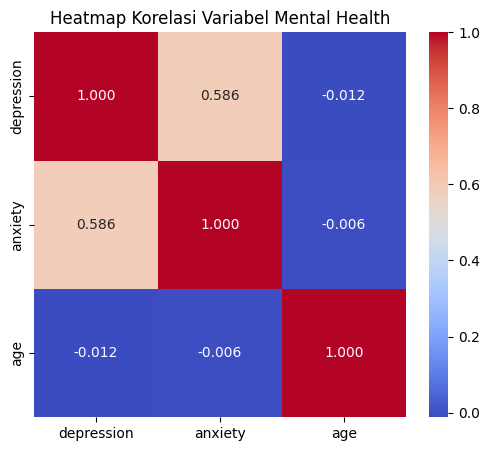

In [221]:
numeric_cols = ['depression', 'anxiety', 'age']

corr_matrix = data_all[numeric_cols].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Heatmap Korelasi Variabel Mental Health")
plt.show()

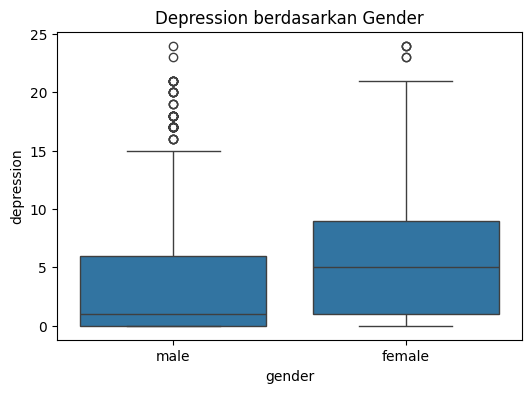

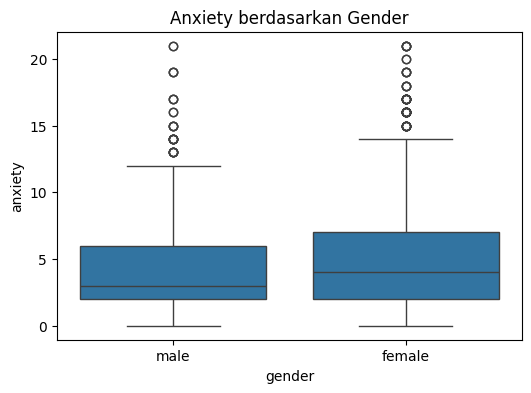

In [222]:
plt.figure(figsize=(6,4))
sns.boxplot(data=data_all, x="gender", y="depression")
plt.title("Depression berdasarkan Gender")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(data=data_all, x="gender", y="anxiety")
plt.title("Anxiety berdasarkan Gender")
plt.show()


##### Status Pekerjaan

In [ ]:
if "Occupational_Status" in data_mendeley.columns:
    data_mendeley["occupation_category"] = "Other"
    data_mendeley.loc[data_mendeley["Occupational_Status"].str.contains("student", case=False, na=False),
                      "occupation_category"] = "Student"
    data_mendeley.loc[data_mendeley["Occupational_Status"].str.contains("unemployed", case=False, na=False),
                      "occupation_category"] = "Unemployed"
    data_mendeley.loc[data_mendeley["Occupational_Status"].str.contains("employee|worker|staff", case=False, na=False),
                      "occupation_category"] = "General_Worker"
else:
    data_mendeley["occupation_category"] = "Other"

data_kaggle["occupation_category"] = "Tech_Worker"

data_figshare["occupation_category"] = "Student"


In [224]:
key_cols_extended = ["depression", "anxiety", "occupation_category"]

mendeley_key = data_mendeley[key_cols_extended]
kaggle_key = data_kaggle[key_cols_extended]
figshare_key = data_figshare[key_cols_extended]

data_all= pd.concat([figshare_key, kaggle_key, mendeley_key], ignore_index=True)

In [225]:
data_all

,depression,anxiety,occupation_category
0,9.0,11.0,Student
1,8.0,5.0,Student
2,8.0,6.0,Student
3,19.0,15.0,Student
4,6.0,14.0,Student
...,...,...,...
3842,8.0,10.0,Other
3843,6.0,6.0,Other
3844,1.0,2.0,Other
3845,6.0,5.0,Other


In [226]:
analysis = data_all.groupby("occupation_category")[["depression", "anxiety"]].mean().round(2)
print("=== Rata-rata Depresi & Anxiety Berdasarkan Status Pekerjaan ===")
print(analysis)

=== Rata-rata Depresi & Anxiety Berdasarkan Status Pekerjaan ===
                     depression  anxiety
occupation_category                     
Other                      6.68     4.60
Student                    7.12     6.81
Tech_Worker                0.51     1.54


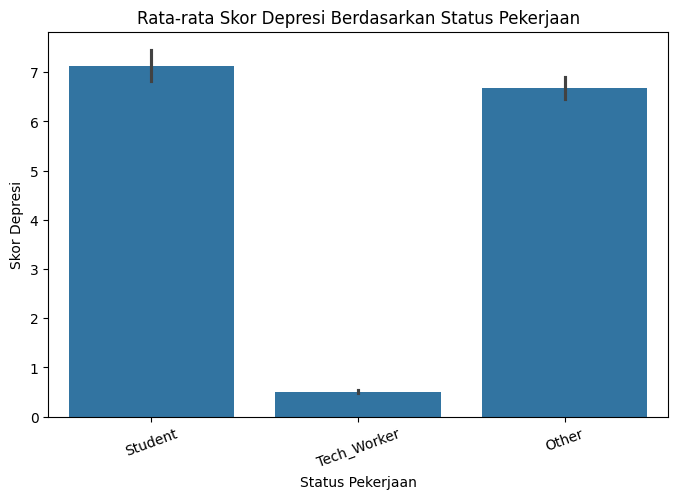

In [227]:
plt.figure(figsize=(8,5))
sns.barplot(data=data_all, x="occupation_category", y="depression")
plt.title("Rata-rata Skor Depresi Berdasarkan Status Pekerjaan")
plt.xlabel("Status Pekerjaan")
plt.ylabel("Skor Depresi")
plt.xticks(rotation=20)
plt.show()

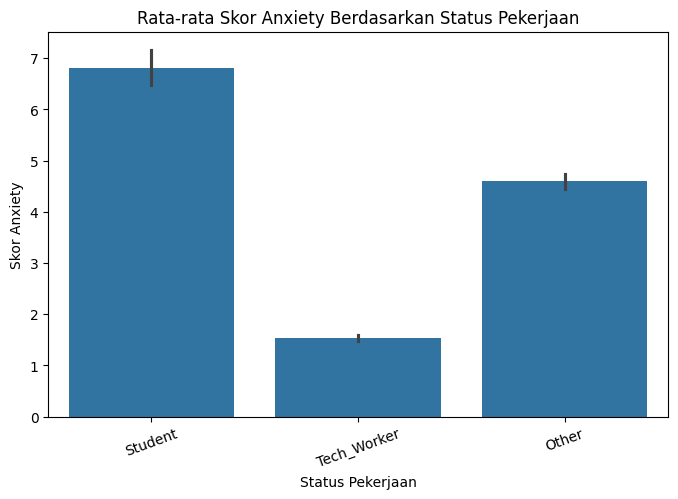

In [228]:
plt.figure(figsize=(8,5))
sns.barplot(data=data_all, x="occupation_category", y="anxiety")
plt.title("Rata-rata Skor Anxiety Berdasarkan Status Pekerjaan")
plt.xlabel("Status Pekerjaan")
plt.ylabel("Skor Anxiety")
plt.xticks(rotation=20)
plt.show()